In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cwd = os.getcwd()
root_directory = os.path.dirname(os.getcwd())

In [3]:
df_all = pd.read_csv(f"{root_directory}/../data/all_data.csv")
# check if the plot folder exists
if not os.path.exists(f"{root_directory}/../data_analysis/plots"):
    print("Creating plots folder")
    os.mkdir(f"{root_directory}/../data_analysis/plots")
else:
    print("plots folder exists")

df_all.info()

plots folder exists
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11161945 entries, 0 to 11161944
Data columns (total 39 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   area_percent    float64
 2   update_time     float64
 3   delta_time      float64
 4   plan_length     int64  
 5   replan_count    int64  
 6   logging_time    float64
 7   epsilon_0       float64
 8   epsilon_1       float64
 9   epsilon_2       float64
 10  epsilon_3       float64
 11  frame_count     int64  
 12  known_area      int64  
 13  success         bool   
 14  seed            int64  
 15  draw_sim        bool   
 16  log_plots       bool   
 17  use_threads     bool   
 18  n_bots          int64  
 19  grid_thickness  int64  
 20  screen_width    int64  
 21  screen_height   int64  
 22  min_room_size   int64  
 23  max_room_size   int64  
 24  wall_ratio      float64
 25  method          object 
 26  start_scenario  object 
 27  goal_scenario   obj

In [4]:
df_all.shape

(11161945, 39)

In [5]:
# drop all columns with NaN values
df_all = df_all.dropna(axis=1)
df_all.shape

(11161945, 27)

In [6]:
df_all['method'] = df_all['method'].astype('category')
df_all['method'] = df_all['method'].apply(lambda x: x.replace('_', ' ').title())

# remove all _ from the column names
df_all.columns = df_all.columns.str.replace('_', ' ')
# make all the columns tital like
df_all.columns = df_all.columns.str.title()



In [7]:
df_all.describe()


,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Seed,N Bots,Grid Thickness,Screen Width,Screen Height,Min Room Size,Max Room Size,Wall Ratio,Experiment Id
count,1.116194e+07,1.116194e+07,1.116194e+07,1.116194e+07,1.116194e+07,1.116194e+07,1.116194e+07,1.116194e+07,1.116194e+07,1.116194e+07,1.116194e+07,11161945.0,11161945.0,11161945.0,1.116194e+07,11161945.0,1.116194e+07,1.116194e+07
mean,5.580972e+06,8.075823e-01,1.036182e-01,8.232586e+00,1.464326e+02,1.759472e+02,2.134520e-04,1.191279e+02,2.018956e+03,6.446369e+01,6.814906e+00,10.0,500.0,500.0,1.126871e+02,200.0,1.708909e-01,3.341838e+04
std,3.222176e+06,2.341073e-01,1.562411e-01,6.310749e+00,1.039839e+02,1.369727e+02,1.445323e-03,1.096674e+02,5.852683e+02,8.638772e+00,3.188040e+00,0.0,0.0,0.0,6.540177e+01,0.0,7.411197e-02,1.976885e+04
min,0.000000e+00,4.560000e-02,0.000000e+00,1.000000e-02,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,1.140000e+02,5.000000e+01,4.000000e+00,10.0,500.0,500.0,4.000000e+01,200.0,9.680000e-02,0.000000e+00
25%,2.790486e+06,6.912000e-01,3.000000e-02,3.380000e+00,7.200000e+01,8.300000e+01,0.000000e+00,4.100000e+01,1.728000e+03,5.700000e+01,4.000000e+00,10.0,500.0,500.0,4.000000e+01,200.0,9.680000e-02,1.526100e+04
50%,5.580972e+06,9.148000e-01,6.000000e-02,6.960000e+00,1.160000e+02,1.420000e+02,0.000000e+00,8.800000e+01,2.287000e+03,6.500000e+01,4.000000e+00,10.0,500.0,500.0,1.200000e+02,200.0,1.300000e-01,3.566200e+04
75%,8.371458e+06,9.912000e-01,1.000000e-01,1.158000e+01,1.950000e+02,2.300000e+02,0.000000e+00,1.630000e+02,2.478000e+03,7.200000e+01,8.000000e+00,10.0,500.0,500.0,2.000000e+02,200.0,2.616000e-01,4.895100e+04
max,1.116194e+07,1.000000e+00,4.890000e+00,8.700000e+01,1.205000e+03,1.419000e+03,1.000000e-02,9.200000e+02,2.500000e+03,7.900000e+01,1.200000e+01,10.0,500.0,500.0,2.000000e+02,200.0,2.772000e-01,6.749900e+04


In [8]:
# conver columns to category that have less than 10 unique values
for col in df_all.columns:
    if df_all[col].nunique() < 20:
        df_all[col] = df_all[col].astype('category')

In [9]:
df_all.columns
# '''
# 'Unnamed: 0', 'Area Percent', 'Update Time', 'Delta Time',
#        'Plan Length', 'Replan Count', 'Logging Time', 'Frame Count',
#        'Known Area', 'Success', 'Seed', 'Draw Sim', 'Log Plots', 'Use Threads',
#        'N Bots', 'Grid Thickness', 'Screen Width', 'Screen Height',
#        'Min Room Size', 'Max Room Size', 'Wall Ratio', 'Method',
#        'Start Scenario', 'Goal Scenario', 'Experiment Id', 'Loss Type',
#        'Execution Date']
#        '''

Index(['Unnamed: 0', 'Area Percent', 'Update Time', 'Delta Time',
       'Plan Length', 'Replan Count', 'Logging Time', 'Frame Count',
       'Known Area', 'Success', 'Seed', 'Draw Sim', 'Log Plots', 'Use Threads',
       'N Bots', 'Grid Thickness', 'Screen Width', 'Screen Height',
       'Min Room Size', 'Max Room Size', 'Wall Ratio', 'Method',
       'Start Scenario', 'Goal Scenario', 'Experiment Id', 'Loss Type',
       'Execution Date'],
      dtype='object')

In [10]:
df_all['M'] = df_all['Method'].apply(lambda x: ''.join([str(i[0])+'.' for i in x.split(' ')]))

wost_case = df_all.groupby(['M']).max()[['Frame Count', 'Replan Count','Delta Time', 'Update Time']].sort_values(by='Frame Count')
with open(f"{root_directory}/../data_analysis/plots/worst_case.txt", 'w') as f:
    f.write(wost_case.to_latex())
wost_case

/tmp/ipykernel_1109869/2634451610.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  wost_case = df_all.groupby(['M']).max()[['Frame Count', 'Replan Count','Delta Time', 'Update Time']].sort_values(by='Frame Count')
/tmp/ipykernel_1109869/2634451610.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(wost_case.to_latex())


,Frame Count,Replan Count,Delta Time,Update Time
M,,,,
V.F.H.C.,254,955,43.09,3.35
D.F.C.,324,1253,87.00,2.28
D.E.G.U.,348,664,48.51,4.89
U.C.,437,1122,63.72,4.75
V.F.H.R.,442,457,35.57,3.46
U.R.,544,465,39.34,3.35
D.E.G.F.,549,1259,49.95,4.67
F.C.,623,1419,46.47,3.83
G.,626,1033,46.73,3.68


<AxesSubplot:xlabel='Frame Count', ylabel='Area Percent'>

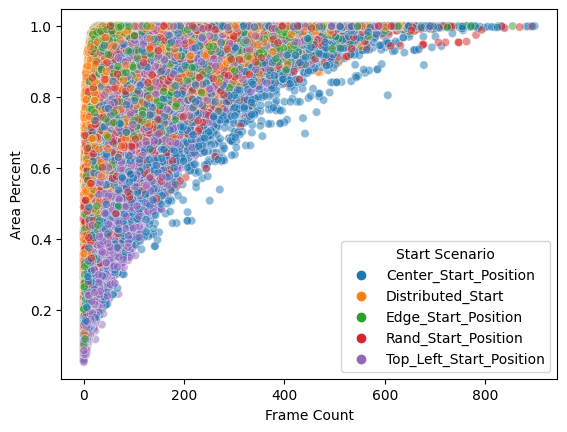

In [11]:
sns.scatterplot(x="Frame Count",y='Area Percent', hue="Start Scenario", data=df_all.sample(108_805), alpha=.5,)
# df_all.groupby('Start Scenario')

<AxesSubplot:xlabel='Frame Count', ylabel='Area Percent'>

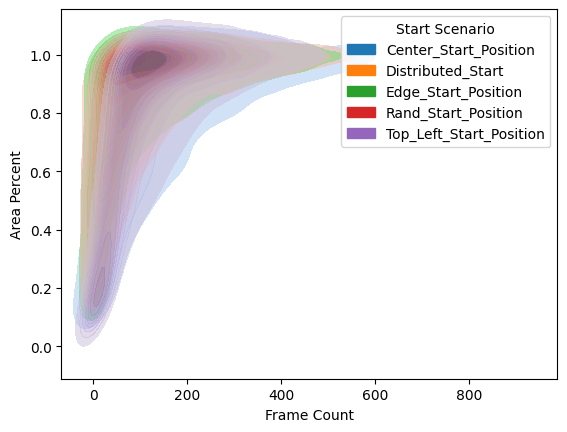

In [12]:
sns.kdeplot(x="Frame Count",y='Area Percent', hue="Start Scenario", 
            data=df_all.sample(108_805), alpha=.5,
            fill=True
            )

/tmp/ipykernel_1109869/1616129651.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data= df_all.sample(108_805)[df_all['Area Percent'] == 0.5]
/tmp/ipykernel_1109869/1616129651.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data= df_all.sample(108_805)[df_all['Area Percent'] == 0.75]


<AxesSubplot:xlabel='Frame Count', ylabel='Density'>

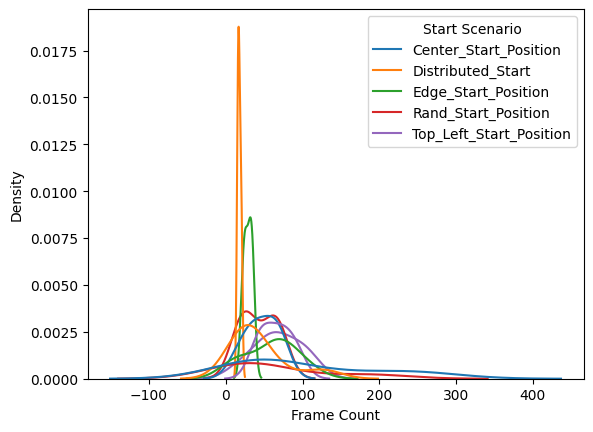

In [13]:
sns.kdeplot(x="Frame Count", hue="Start Scenario",
    data= df_all.sample(108_805)[df_all['Area Percent'] == 0.5]
)

sns.kdeplot(x="Frame Count", hue="Start Scenario",
    data= df_all.sample(108_805)[df_all['Area Percent'] == 0.75]
)

0.5
0.6666333333333333
0.8332666666666666
0.9999


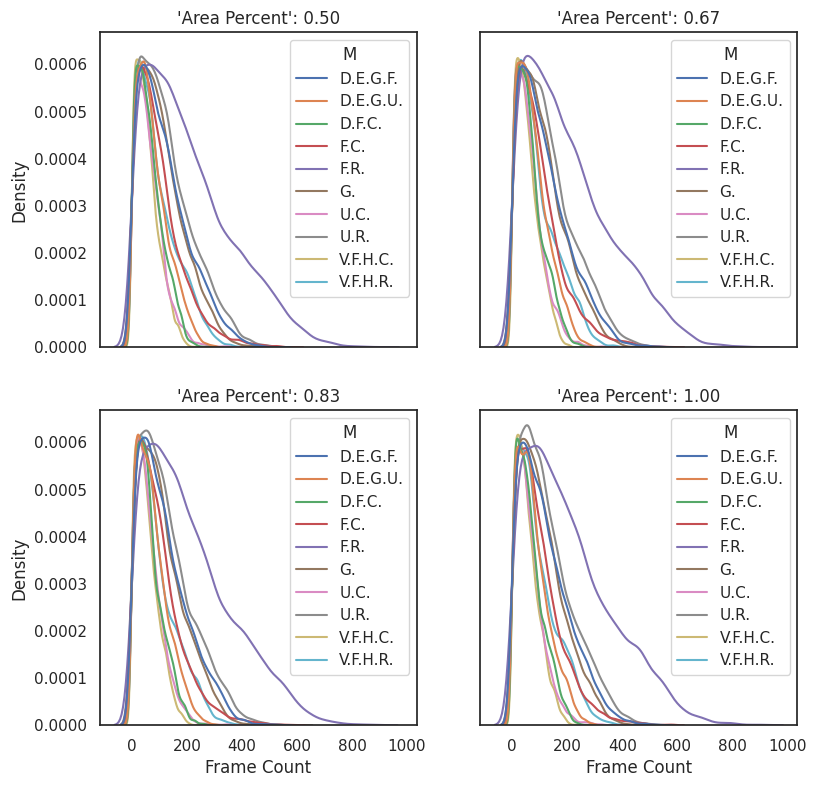

In [20]:
def my_kdys_by_percent(x_name="Frame Count", col = "Area Percent", group_hue="M",
                       linspace_aranage=np.linspace(0.5, 0.9999, 4), sample_size=108_805):

    sns.set_theme(style="white")

    # Set up the matplotlib figure
    f, axes = plt.subplots(2, 2, figsize=(9, 9), sharex=True, sharey=True)

    # Rotate the starting point around the cubehelix hue circle
    for ax, s in zip(axes.flat, linspace_aranage):
        print(s)
        # Define the range
        range_value = 5

        # Calculate the lower and upper bounds
        lower_bound = s - range_value
        upper_bound = s + range_value

        # Filter the data within the range
        filtered_data = df_all[(df_all[col] >= lower_bound) & (df_all[col] <= upper_bound)]

        # Sample the filtered data
        sampled_data = filtered_data.sample(sample_size)

        # Create the plot
        plot = sns.kdeplot(x=x_name, hue=group_hue, data=sampled_data, 
                           ax=ax,
                        #    multiple="stack", 
                        #    cumulative=True, common_norm=False, common_grid=True,
                        )

        # sns.histplot(x=x_name, hue=group_hue, data=sampled_data, 
        #                ax=ax,
        #                kde=True,
        #             #    multiple="stack",
        #              multiple="fill",
        #              legend=False
        #             )
        # get the colors 
        colors = [ax.get_lines()[i].get_color() for i in range(len(ax.get_lines()))]
        # # add tittal with 2 decimal places
        ax.set_title(f"'{col}': {s:.2f}")
    plt.savefig(f'/home/direct-lab/Documents/christopher/Multi_Agents_Area_Exploration/analysing_data/plots/kde_area_percent_vs_frame.png', dpi=300)

    # set x range log
    # axes[0,0]

my_kdys_by_percent()


0.5
0.6666333333333333
0.8332666666666666
0.9999


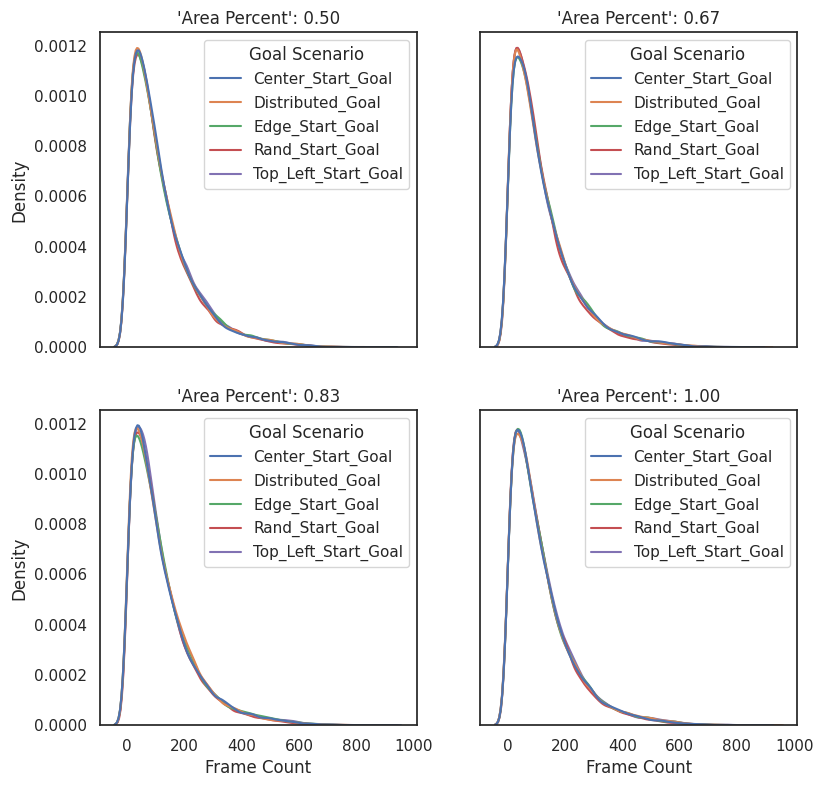

In [17]:
# compare the vonoi with goal situations 
df_all['Goal Scenario'].unique()
my_kdys_by_percent(group_hue='Goal Scenario')